In [3]:
#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
 
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [33]:
df_US = df[(df['job_country'] == "United States") & (df['job_title_short'] == 'Data Analyst')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

In [ ]:
df_US = df_US.explode('job_skills')

df_US_group = df_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_US_top_pay = df_US_group.sort_values(by='median', ascending=False).head(10)

df_US_top_skills = df_US_group.sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

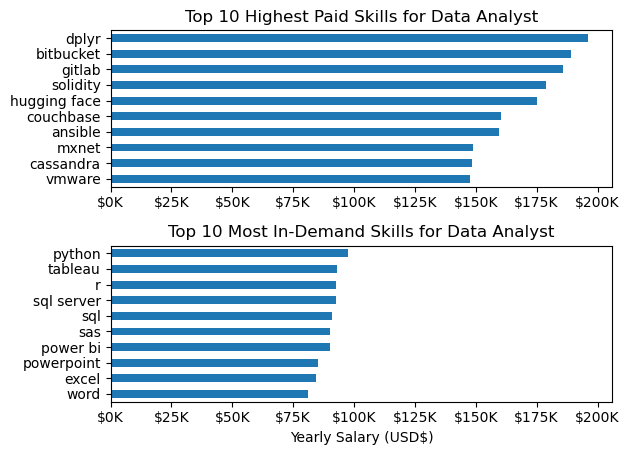

In [93]:
fig, ax = plt.subplots(2,1)

df_US_top_pay.plot(kind='barh',y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_US_top_skills.plot(kind='barh', y='median',ax=ax[1], legend=False)
ax[1].set_xlabel('Yearly Salary (USD$)')
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())




fig.suptitle('')
fig.tight_layout()
plt.show()